In [8]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn import preprocessing

In [12]:
d=pd.read_csv("C:/Users/JESTIN K TOMY/Documents/Downloads/Logistic_Regression_Binary_Classsification_Churn_Data.csv")

In [13]:
d.head(10)

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,8,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,22,Yes,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,10,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,28,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,62,Yes,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [5]:
d.keys()

Index(['customerID', 'tenure', 'PhoneService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [10]:
label_encoder=preprocessing.LabelEncoder()

In [19]:
d['Contract']=label_encoder.fit_transform(d['Contract'])
d['MonthlyCharges']=label_encoder.fit_transform(d['MonthlyCharges'])
d['TotalCharges']=label_encoder.fit_transform(d['TotalCharges'])
d['Churn']=label_encoder.fit_transform(d['Churn'])
d['PhoneService']=label_encoder.fit_transform(d['PhoneService'])

In [20]:
d.head(20)

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,0,Yes,Electronic check,142,2505,0
1,5575-GNVDE,34,1,1,No,Mailed check,498,1466,0
2,3668-QPYBK,2,1,0,Yes,Mailed check,436,157,1
3,7795-CFOCW,45,0,1,No,Bank transfer (automatic),266,1400,0
4,9237-HQITU,2,1,0,Yes,Electronic check,729,925,1
5,9305-CDSKC,8,1,0,Yes,Electronic check,1274,6104,1
6,1452-KIOVK,22,1,0,Yes,Credit card (automatic),1075,1550,0
7,6713-OKOMC,10,0,0,No,Mailed check,140,2609,0
8,7892-POOKP,28,1,0,Yes,Electronic check,1371,2646,1
9,6388-TABGU,62,1,1,No,Bank transfer (automatic),482,3022,0


In [22]:
df=d.drop(['customerID','PaperlessBilling','PaymentMethod'],axis=1)

In [24]:
df.head()

,tenure,PhoneService,Contract,MonthlyCharges,TotalCharges,Churn
0,1,0,0,142,2505,0
1,34,1,1,498,1466,0
2,2,1,0,436,157,1
3,45,0,1,266,1400,0
4,2,1,0,729,925,1


In [26]:
x=df.drop('Churn',axis=1)
y=df.Churn

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [31]:
regressor=LogisticRegression()

In [32]:
regressor.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
prediction=regressor.predict(x_test)

In [35]:
prediction[0]

0

In [36]:
regressor.score(x_test, y_test)

0.794434980124929

In [37]:
precision_score(y_test,prediction)

0.6077922077922078

In [38]:
recall_score(y_test,prediction)

0.5258426966292135

In [39]:
f1_score(y_test, prediction)

0.5638554216867471

In [40]:
y_pred_prob = regressor.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

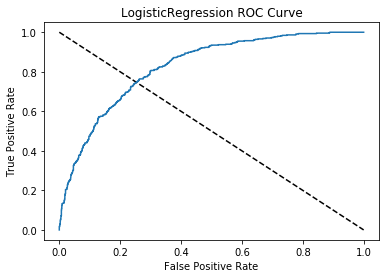

In [41]:
plt.plot([0, 1], [1, 0], 'k--')
plt.plot(fpr, tpr, label='LogisticRegression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LogisticRegression ROC Curve')
plt.show()